In [1]:
# Final_Samples
import pandas as pd
import numpy as np
import json
import random
usable_samples_ADNI = json.load(open('./usable_samples_ADNI.json'))
PRS_feature_matrix = np.load('./PRS_feature_matrix.npy').astype(np.float32)
PRS_feature_matrix = (PRS_feature_matrix - PRS_feature_matrix.mean(0))/PRS_feature_matrix.std(0)
PRS_feature_matrix.shape, len(usable_samples_ADNI), usable_samples_ADNI

((1816, 23),
 1816,
 {'ADNI3_036_S_6231': 0,
  'ADNI3_006_S_6277': 1,
  'ADNI3_129_S_6146': 2,
  'ADNI3_033_S_6352': 3,
  'ADNI3_027_S_6183': 4,
  'ADNI3_005_S_6427': 5,
  'ADNI3_127_S_6147': 6,
  'ADNI3_114_S_6251': 7,
  'ADNI3_129_S_6228': 8,
  'ADNI3_114_S_6309': 9,
  'ADNI3_135_S_6110': 10,
  'ADNI3_020_S_6358': 11,
  'ADNI3_135_S_6411': 12,
  'ADNI3_024_S_6202': 13,
  'ADNI3_018_S_6414': 14,
  'ADNI3_002_S_6103': 15,
  'ADNI3_177_S_6408': 16,
  'ADNI3_014_S_6148': 17,
  'ADNI3_036_S_6466': 18,
  'ADNI3_036_S_6134': 19,
  'ADNI3_007_S_6455': 20,
  'ADNI3_037_S_6271': 21,
  'ADNI3_116_S_6100': 22,
  'ADNI3_027_S_6327': 23,
  'ADNI3_099_S_6097': 24,
  'ADNI3_127_S_6330': 25,
  'ADNI3_127_S_6168': 26,
  'ADNI3_018_S_6351': 27,
  'ADNI3_009_S_6212': 28,
  'ADNI3_168_S_6180': 29,
  'ADNI3_116_S_6119': 30,
  'ADNI3_023_S_6346': 31,
  'ADNI3_168_S_6065': 32,
  'ADNI3_035_S_6200': 33,
  'ADNI3_023_S_6399': 34,
  'ADNI3_037_S_6125': 35,
  'ADNI3_116_S_6428': 36,
  'ADNI3_041_S_6192': 37,
  

In [2]:
a = np.array([['a',1],['b',2],['c',3],['d',4]]).tolist()
random.shuffle(a)
a

[['c', '3'], ['d', '4'], ['b', '2'], ['a', '1']]

In [3]:
df = pd.read_csv('./COVAR_FILE_bigger_dataset.txt', ' ') 
print( df[['AGE', 'PTGENDER']].shape, df[['AGE', 'PTGENDER']].dropna().shape )
print( df.head() ) # PC - Principal Component

(1817, 2) (1817, 2)
                FID               IID       PC1       PC2       PC3       PC4  \
0  ADNI3_036_S_6231  ADNI3_036_S_6231 -0.006724 -0.010617  0.001596 -0.000460   
1  ADNI3_006_S_6277  ADNI3_006_S_6277 -0.010432 -0.010269  0.012757  0.006921   
2  ADNI3_129_S_6146  ADNI3_129_S_6146 -0.004919 -0.011656 -0.035521  0.064641   
3  ADNI3_033_S_6352  ADNI3_033_S_6352 -0.014069 -0.010279  0.020014  0.053023   
4  ADNI3_027_S_6183  ADNI3_027_S_6183 -0.010766 -0.012370 -0.010960  0.029830   

        PC5       PC6       PC7       PC8       PC9      PC10  PTGENDER   AGE  
0 -0.013131 -0.005855 -0.005142 -0.009063 -0.001739 -0.012863         1  69.1  
1 -0.014958 -0.005860 -0.027775 -0.009632  0.054966  0.087390         1  70.7  
2  0.012094  0.003860  0.035955  0.006561  0.019736 -0.023304         1  65.5  
3  0.023691  0.000247 -0.002273 -0.030627 -0.053461  0.049984         0  71.4  
4 -0.019520 -0.001955  0.023844  0.079138  0.002207  0.008892         0  65.6  


C:\Users\HP\.conda\envs\ad_venv_2\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:

# COVAR_FILE = df.to_numpy()[:, 2:].astype(np.float32)
cnt = 0
FEATURE_MATRIX = np.concatenate([PRS_feature_matrix, np.zeros([PRS_feature_matrix.shape[0], 12])], 1).astype(np.float32)
for sample in usable_samples_ADNI:
    covar = df[df['IID'] == sample].to_numpy()[:, 2:].astype(np.float32) # taking from the PCs, skipping the first two columns of IID, FID
#     if cnt < 2:
#         print(covar)
    if covar.shape[0] != 1:
#         print(sample)
        cnt += 1
        continue
    FEATURE_MATRIX[usable_samples_ADNI[sample], 23:] = covar
cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]

(0.1288546255506608,
 array([[ 1.1957877e+00,  6.7549521e-01, -9.1707712e-01,  1.4735116e+00,
          1.5833879e+00,  1.1038882e+00,  1.3769143e+00, -2.5817478e-01,
          6.0254073e-01,  2.0768111e+00,  3.4892298e-02,  1.5471818e+00,
          2.1130602e-01, -7.8878814e-01,  1.1477689e+00, -7.1390218e-01,
          6.5592009e-01,  3.6035888e-02, -1.0208811e+00,  4.2786098e-01,
          3.8611200e-01, -5.8913165e-01, -5.6206602e-01, -6.7239902e-03,
         -1.0617300e-02,  1.5955199e-03, -4.6042900e-04, -1.3131300e-02,
         -5.8546802e-03, -5.1415302e-03, -9.0632401e-03, -1.7389200e-03,
         -1.2863100e-02,  1.0000000e+00,  6.9099998e+01],
        [ 6.9074273e-01,  8.7522858e-01,  2.9257846e-01, -3.7697020e-01,
         -4.5436200e-01,  7.2349036e-01, -2.8283790e-01,  1.0644186e+00,
          3.2023571e-02,  5.9753662e-01, -2.4813785e-01,  2.8968764e-02,
         -2.7886992e-02,  2.6224835e+00,  4.3087134e-01, -2.8895292e-01,
          2.4560858e-01, -5.2110817e-02, -4.4

In [5]:
!conda list

# packages in environment at C:\Users\HP\.conda\envs\ad_venv_2:
#
# Name                    Version                   Build  Channel
asttokens                 2.0.5              pyhd3eb1b0_0    anaconda
backcall                  0.2.0              pyhd3eb1b0_0    anaconda
blas                      1.0                         mkl  
bottleneck                1.3.5           py310h9128911_0  
brotli                    1.0.9                ha925a31_2  
brotlipy                  0.7.0           py310h2bbff1b_1002  
bzip2                     1.0.8                he774522_0    anaconda
ca-certificates           2022.4.26            haa95532_0  
certifi                   2022.6.15       py310haa95532_0  
cffi                      1.15.0          py310h2bbff1b_1  
charset-normalizer        2.0.4              pyhd3eb1b0_0  
cloudpickle               2.0.0              pyhd3eb1b0_0  
colorama                  0.4.4              pyhd3eb1b0_0    anaconda
cryptography              37.0.1          py

In [6]:
def save_in_file(model_name, accuracy):
    model_file = open("model_details.txt","a")
    model_file.write(model_name + " -> accuracy : " + str(accuracy) + "\n" )
    model_file.close() 

In [7]:
if True:   
    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn


import os
import time
import sys

import torch as t
from torch import nn
from torch.autograd import Variable

feature_indices_to_consider = list(range(23))#list(range(35)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]

class simple_model(nn.Module):
    def __init__(self, num_features=FEATURE_MATRIX.shape[1], hidden_dim=32*4, drop_probab=0.3):
        super(simple_model, self).__init__()
        
        ####
        self.drop_probab = drop_probab
        self.dropout_feature = nn.Dropout(p=0.3)
        self.fc1 = nn.Linear(num_features, hidden_dim)
        self.dropout1 = nn.Dropout(p=self.drop_probab)
        num_hidden = 4
        self.fc_hidden = nn.ModuleList([nn.Linear(hidden_dim, hidden_dim) for i in range(num_hidden)])
        self.dropout_hidden = nn.ModuleList([nn.Dropout(p=0.0) for i in range(num_hidden)])
        self.fc2 = nn.Linear(hidden_dim, 8)
        self.dropout2 = nn.Dropout(p=0.3)
        self.outLayer = nn.Linear(8, 1)
#         self.softmax = nn.Softmax(-1)
        self.sigmoid = nn.Sigmoid()
        self.num_hidden = num_hidden
        ####

    def forward(self, features):
        features = self.dropout_feature(features)
        features = self.fc1(features)
        features = self.dropout1(features)
        for i in range(self.num_hidden):
            features = self.fc_hidden[i](features)
            features = self.dropout_hidden[i](features)
        features = self.fc2(features)
        features = self.dropout2(features)
        logit = self.outLayer(features)
#         print(features.shape, features)
        probab = self.sigmoid(logit)
        return probab
    

In [8]:
if True:
    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn


import os
import time
import sys

import torch as t
from torch import nn
from torch.autograd import Variable

feature_indices_to_consider = list(range(23))#list(range(35)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]
hidden = 6
class simple_model(nn.Module):
    def __init__(self, num_features=FEATURE_MATRIX.shape[1], hidden_dim=32, drop_probab=.8):
        super(simple_model, self).__init__()
        
        ####
        self.fc1 = nn.Linear(num_features, hidden_dim)
        num_hidden = hidden
        self.fc_hidden = nn.ModuleList([nn.Linear(hidden_dim, hidden_dim) for i in range(num_hidden)])
        self.fc2 = nn.Linear(hidden_dim, 8)
        self.outLayer = nn.Linear(8, 1)
#         self.softmax = nn.Softmax(-1)
        self.sigmoid = nn.Sigmoid()
        self.num_hidden = num_hidden
        self.drop_probab = drop_probab
        self.dropout = nn.functional.dropout
        ####

    def forward(self, features):
        features = self.fc1(features)
        features = self.dropout(features, p=self.drop_probab)
        for i in range(self.num_hidden):
            features = self.fc_hidden[i](features)
        features = self.fc2(features)
        features = self.dropout(features, p=self.drop_probab)
        logit = self.outLayer(features)
#         print(features.shape, features)
        probab = self.sigmoid(logit)
        return probab
    

In [9]:
import json
import numpy as np
import random

In [10]:
Final_Samples = json.load(open('Final_Samples.json', 'r')) 
print(len(Final_Samples))
print(Final_Samples[:2])
positive_samples = Final_Samples[:654] # Final_Samples[654:]
positive_samples = Final_Samples[:654]
negative_samples = Final_Samples[654:]
random_seed = None
if random_seed is not None: 
    random.seed(random_seed * 2)
random.shuffle(positive_samples)
random.shuffle(negative_samples)
Final_Samples = positive_samples[:500] + negative_samples[:500]
print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
Final_Samples = np.array(Final_Samples)
Final_Samples.shape
# Final_Samples.reshape(10, -1, 2).shape

1158
[['129_S_4422', 1], ['062_S_0690', 1]]
500 500


(1000, 2)

In [11]:
simple_model(num_features=len(feature_indices_to_consider))

simple_model(
  (fc1): Linear(in_features=23, out_features=32, bias=True)
  (fc_hidden): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=32, bias=True)
  )
  (fc2): Linear(in_features=32, out_features=8, bias=True)
  (outLayer): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [12]:
import torch
from torch.utils import data

class dataSet(data.Dataset):
    def __init__(self, Final_Samples, feature_matrix, usable_samples_ADNI, feature_indices_to_consider=feature_indices_to_consider):
        super(dataSet, self).__init__()  
        self.data_len = len(Final_Samples)
        self.usable_samples_ADNI = usable_samples_ADNI
        self.Final_Samples = Final_Samples
        self.feature_indices_to_consider = feature_indices_to_consider
        self.feature_matrix = feature_matrix[:, self.feature_indices_to_consider]
        
    def __getitem__(self, index):
        features = torch.from_numpy(self.feature_matrix[self.usable_samples_ADNI[self.Final_Samples[index][0]]]).float()
        label = torch.tensor([float(self.Final_Samples[index][1])]).float()
        return features, label
    
    def update_prs_features(self, mean, std):
        self.feature_matrix = (self.feature_matrix - mean) / std
        
    def get_mean_std(self):
        mean = self.feature_matrix.mean(0)
        std = self.feature_matrix.std(0)
        return mean, std
        
    def __len__(self):
        return self.data_len

In [13]:

def random_samples(total_folds, random_seed=None):
    Final_Samples = json.load(open('Final_Samples.json', 'r')) 
    positive_samples = Final_Samples[:654]
    negative_samples = Final_Samples[654:]
    if random_seed is not None: 
        random.seed(random_seed * 2)
    random.shuffle(positive_samples)
    random.shuffle(negative_samples)
    Final_Samples = positive_samples[:500] + negative_samples[:500]
    if random_seed is not None: 
        random.seed(random_seed)
    random.shuffle(Final_Samples)
    Final_Samples = np.array(Final_Samples)
    N_splits = Final_Samples.reshape(total_folds, -1, 2)
    return N_splits

def generate_datasets(N_splits, fold_num, random_seed):
    test_samples = N_splits[fold_num:fold_num+1].reshape([-1, 2])
    train_samples = np.concatenate([N_splits[0:fold_num],N_splits[fold_num+1:]], 0).reshape([-1, 2]).tolist()
    if random_seed is not None: 
        random.seed(random_seed * 3)
    random.shuffle(train_samples)
    train_samples = np.array(train_samples)
    split_pos = int(train_samples.shape[0] * 1.) 
    #split_pos = int(train_samples.shape[0] * .8) 
#     print(train_samples.shape, split_pos, train_samples.shape[0])
    train_samples, val_samples = train_samples[:split_pos], train_samples[split_pos:]
    train_set = dataSet(Final_Samples=train_samples, 
                        feature_matrix=FEATURE_MATRIX, 
                        usable_samples_ADNI=usable_samples_ADNI)
    val_set = dataSet(Final_Samples=val_samples, 
                      feature_matrix=FEATURE_MATRIX, 
                      usable_samples_ADNI=usable_samples_ADNI)
    test_set = dataSet(Final_Samples=test_samples, 
                      feature_matrix=FEATURE_MATRIX, 
                      usable_samples_ADNI=usable_samples_ADNI)
    mean, std = train_set.get_mean_std()
    train_set.update_prs_features(mean, std)
    val_set.update_prs_features(mean, std)
    test_set.update_prs_features(mean, std)
    
    return train_set, val_set, test_set

def generate_loader(train_set, val_set, test_set, num_workers):
    train_batch_size = train_set.__len__()
    val_batch_size = val_set.__len__()
    test_batch_size = test_set.__len__()
    train_loader = torch.utils.data.DataLoader(train_set,
                                              batch_size=train_batch_size,
                                              shuffle=True,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    val_loader = torch.utils.data.DataLoader(val_set,
                                              batch_size=val_batch_size,
                                              shuffle=False,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    test_loader = torch.utils.data.DataLoader(test_set,
                                              batch_size=test_batch_size,
                                              shuffle=False,
                                              pin_memory=(torch.cuda.is_available()),
                                              num_workers=num_workers)
    return train_loader, val_loader, test_loader

train_set, val_set, test_set = generate_datasets(N_splits=random_samples(total_folds=10, random_seed=0), fold_num=0, random_seed=0)
val_set.feature_matrix.shape

(1816, 23)

In [14]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, precision_recall_curve, auc


def epoch(model, optimizer, criterion, is_training, loader):
    pred = []
    true = []
    total_loss = 0.
    
    for batch_idx, (features, label) in enumerate(loader):
        features = torch.autograd.Variable(features.to(DEVICE).float())
        label = torch.autograd.Variable(label.to(DEVICE).float())
#         print(features.shape, label.shape)
        probab = model(features)
    
        if is_training:  
            loss = criterion(probab, label)
            ## compute gradient and do SGD step 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
#             print(batch_idx, ':', loss) 
        pred += probab.detach().cpu().numpy().tolist()
        true += label.detach().cpu().numpy().tolist()
    
    pred, true, total_loss = np.array(pred).reshape([-1]), np.array(true).reshape([-1]), total_loss
    pred_binary = (pred > .5).astype(float)
#     precision, recall, fscore, support = precision_recall_fscore_support(true, pred_binary)
#     auroc = roc_auc_score(true, pred)
#     p, r, thresholds = precision_recall_curve(true, pred)
#     auprc = auc(r, p)
    acc = (pred_binary==true).mean()
    
#     return precision[1], recall[1], fscore[1], support, auroc, auprc, acc, total_loss, pred, pred_binary, true
    return None, None, None, None, None, None, acc, total_loss, pred, pred_binary, true
    
import json
import pandas as pd
GWAS_ID = 'ieu-b-25'
usable_samples_ADNI = pd.read_csv(f'./prsice_output/{GWAS_ID}/{GWAS_ID}.best', ' ')['IID'].to_numpy().tolist()
usable_samples_ADNI = {'_'.join(sample.split('_')[1:]):idx for idx,sample in enumerate(usable_samples_ADNI)}
# usable_samples_ADNI = {sample:idx for idx,sample in enumerate(usable_samples_ADNI)}
usable_samples_ADNI

{'036_S_6231': 0,
 '006_S_6277': 1,
 '129_S_6146': 2,
 '033_S_6352': 3,
 '027_S_6183': 4,
 '005_S_6427': 5,
 '127_S_6147': 6,
 '114_S_6251': 7,
 '129_S_6228': 8,
 '114_S_6309': 9,
 '135_S_6110': 10,
 '020_S_6358': 11,
 '135_S_6411': 12,
 '024_S_6202': 13,
 '018_S_6414': 14,
 '002_S_6103': 15,
 '177_S_6408': 16,
 '014_S_6148': 17,
 '036_S_6466': 18,
 '036_S_6134': 19,
 '007_S_6455': 20,
 '037_S_6271': 21,
 '116_S_6100': 22,
 '027_S_6327': 23,
 '099_S_6097': 24,
 '127_S_6330': 25,
 '127_S_6168': 26,
 '018_S_6351': 27,
 '009_S_6212': 28,
 '168_S_6180': 29,
 '116_S_6119': 30,
 '023_S_6346': 31,
 '168_S_6065': 32,
 '035_S_6200': 33,
 '023_S_6399': 34,
 '037_S_6125': 35,
 '116_S_6428': 36,
 '041_S_6192': 37,
 '941_S_6333': 38,
 '006_S_6209': 39,
 '033_S_6497': 40,
 '127_S_6436': 41,
 '141_S_6178': 42,
 '002_S_6456': 43,
 '168_S_6062': 44,
 '033_S_6298': 45,
 '002_S_6053': 46,
 '135_S_6359': 47,
 '141_S_6015': 48,
 '027_S_6317': 49,
 '002_S_6009': 50,
 '098_S_6343': 51,
 '024_S_6033': 52,
 '9

In [15]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

import shap
from copy import deepcopy

print(len(Final_Samples))
usable_indices = [( usable_samples_ADNI[Final_Samples[i][0]] if ( Final_Samples[i][0] in usable_samples_ADNI.keys() ) else None ) for i in range(len(Final_Samples))]
print(len(usable_indices))
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
print("Shape of usable features : ", usable_features.shape)
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])
print("Length of usable labels : ", len(usable_labels))
usable_features = torch.autograd.Variable(torch.from_numpy(usable_features)).to(DEVICE).float()

print("Usable Features : ", usable_features[:2])

1000
1000
Shape of usable features :  (1000, 23)
Length of usable labels :  1000
Usable Features :  tensor([[-1.1393, -1.5769,  1.8639, -0.4617, -0.6564,  0.1849, -0.4884,  0.8216,
         -1.0858,  0.1717, -1.0356, -0.3219, -0.1433, -0.4276,  0.6644, -1.1763,
          0.8648, -1.0961,  1.0509, -0.8475, -0.9026,  0.1053, -0.3120],
        [-0.4787, -0.8984, -0.9886,  2.1627,  1.4211,  1.0062, -0.4210, -0.9654,
          0.7152, -0.1810, -1.5441,  0.7972, -0.3885, -1.0570,  0.3402, -0.0646,
          1.2061, -1.3057,  0.3568, -1.6892, -1.3957, -1.0210, -0.9275]])


In [16]:
from tqdm import tqdm

GENERATE_SHAP = True
total_epochs = 500 #250(ideal)
num_features_list = [usable_features.shape[1]]
# random_integers = [2, 6, 108, 90, 5]
random_integers = [90]#, 92, 0, 87, 73, 82, 54]

folds_list = [10]#[37*2]

avg_val_acc = []

shap_values_list = []
for num_features in num_features_list:
    print(f'NF:{num_features}')
    global_best_acc_val = 0.
    for total_folds in folds_list:
        print(f'\n#F{total_folds}')
        for random_seed in random_integers:
            N_splits = random_samples(total_folds=total_folds, random_seed=random_seed)
            accuracies = []
            accuracies_val = []
            temp_shap_values = np.zeros(usable_features.shape)
            for fold_num in tqdm(range(total_folds)):
    #             print(f'fold-{fold_num}:')
#                 train_set, val_set, test_set = generate_datasets(N_splits=N_splits, fold_num=fold_num, random_seed=random_seed)
                train_set, _, test_set = generate_datasets(N_splits=N_splits, fold_num=fold_num, random_seed=random_seed)
                val_set = test_set        
                train_loader, val_loader, test_loader = generate_loader(train_set=train_set, val_set=val_set, 
                                                                        test_set=test_set, num_workers=0)
                model = simple_model(num_features=usable_features.shape[1], hidden_dim=32)
                model = model.to(DEVICE)
                optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
                criterion = torch.nn.BCEWithLogitsLoss() 
                best_acc_val = 0.
                model_best = None
                for epoch_num in range(total_epochs):
                    model.train()
#                     model.drop_probab=.8
                    precision, recall, fscore, support, auroc, auprc, acc_train, total_loss, pred, pred_binary, true = epoch(model=model, optimizer=optimizer, 
                                                                                             criterion=criterion, is_training=True, 
                                                                                             loader=train_loader)
                    model.eval()
#                     model.drop_probab=.0
                    precision, recall, fscore, support, auroc, auprc, acc_val, total_loss, pred, pred_binary, true = epoch(model=model, 
                                                                                             optimizer=optimizer, 
                                                                                             criterion=criterion, is_training=False, 
                                                                                             loader=val_loader)
                    if acc_val > best_acc_val:
                        best_acc_val = acc_val
                        if acc_val > global_best_acc_val:
                            global_best_acc_val = acc_val
    #                         print('global updated!')
                        torch.save(model.state_dict(), 'PRS_model.pt')
    #                     print(f'#F:{total_folds}| seed:{random_seed}, fold:{fold_num}, epoch:{epoch_num} -> local:{best_acc_val}, global:{global_best_acc_val}')  
#                     if epoch_num + 1 == total_epochs:
#     #                     print(f'LAST_Epoch:{epoch_num}, train_acc:{acc_train}, val_acc:{acc_val}, local_best:{best_acc_val}, global_best:{global_best_acc_val}')
#                         pass
                model_best = simple_model(num_features=usable_features.shape[1], hidden_dim=32, drop_probab=.0)
                model_best.load_state_dict(torch.load('PRS_model.pt'))
                model_best = model_best.to(DEVICE)
                model_best.eval()
                precision, recall, fscore, support, auroc, auprc, acc_test, total_loss, pred, pred_binary, true = epoch(model=model_best, 
                                                                                         optimizer=optimizer, 
                                                                                         criterion=criterion, is_training=False, 
                                                                                         loader=val_loader)
                accuracies += [acc_test]
                accuracies_val += [best_acc_val]
                
#                 print(fold_num, ':', accuracies)
                if GENERATE_SHAP:
                    explainer = shap.GradientExplainer(model_best.to(DEVICE), usable_features,
                                                       batch_size=usable_features.shape[0]) #https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html
                    shap_values = explainer.shap_values(usable_features, nsamples=100)
#                     print("Shap values : ", shap_values)
                    temp_shap_values += shap_values 
            if GENERATE_SHAP:
                temp_shap_values /= total_folds
                shap_values_list += [temp_shap_values] 
            print(f'random_seed:{random_seed}:', np.mean(accuracies), np.std(accuracies), 
                  np.mean(accuracies_val), np.std(accuracies_val), 'train acc:', acc_train)
            avg_val_acc += [np.mean(accuracies_val)]
            
    print(f'global_best_acc_val:{global_best_acc_val}')
# usable_features = usable_features.cpu().detach().numpy().astype(np.float64)
avg_val_acc = np.array(avg_val_acc)
print(avg_val_acc.max(), avg_val_acc.min(), avg_val_acc.mean(), avg_val_acc.std())

NF:23

#F10


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [08:31<00:00, 51.10s/it]

random_seed:90: 0.63 0.04049691346263317 0.692 0.037894590642992824 train acc: 0.63
global_best_acc_val:0.75
0.692 0.692 0.692 0.0


In [17]:
save_in_file("Neural Network with " + str(hidden) + " layers", global_best_acc_val)

In [18]:
usable_features = usable_features.cpu().detach().numpy().astype(np.float64)
print(np.array([.67699, 0.685, 0.694, 0.687, 0.695, 0.693, 0.6849999, 0.683]).mean())
print(np.array([0.6809999999999999, 0.6889999999999998, 0.7060000000000001, 0.6910000000000001, 0.701, 0.6740000000000002, 0.6869999999999999, 0.6869999999999999]).mean())
model

0.6873737375
0.6895


simple_model(
  (fc1): Linear(in_features=23, out_features=32, bias=True)
  (fc_hidden): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=32, bias=True)
  )
  (fc2): Linear(in_features=32, out_features=8, bias=True)
  (outLayer): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [19]:
print( shap_values_list )

import pickle
pickle.dump(shap_values_list, open('shap_values_list.pkl', 'wb'))
shap_values = np.mean(shap_values_list, axis=0)
shap_values.shape

[array([[ 0.00987525, -0.02310374,  0.01875169, ..., -0.07078042,
        -0.00490123, -0.02346102],
       [ 0.00157412, -0.00668759, -0.00931616, ..., -0.0476033 ,
        -0.00690245, -0.02470018],
       [-0.01934392, -0.05650597, -0.01368521, ...,  0.07849792,
         0.04201891,  0.0612434 ],
       ...,
       [-0.02434015,  0.00190358, -0.01275906, ..., -0.0618347 ,
        -0.00806508, -0.04785541],
       [ 0.01858441,  0.05297146,  0.01292539, ...,  0.06045933,
        -0.02529633,  0.07543613],
       [ 0.01786043,  0.01050185, -0.0182114 , ..., -0.03635894,
        -0.00775408, -0.02903136]])]


(1000, 23)

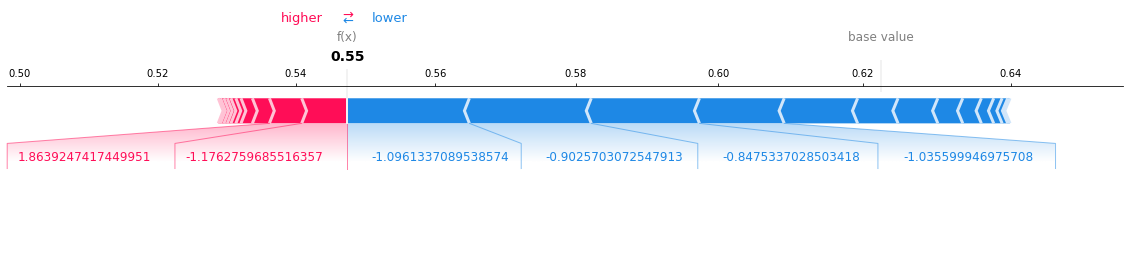

In [20]:
import matplotlib
import matplotlib.pyplot as plt
# print( shap_values_list )
# print the JS visualization code to the notebook
shap.initjs()
# print(shap_values[0, :])
# print(usable_features[0, :])
# shap.summary_plot(shap_values[:, :], usable_features[:, :])

shap.force_plot(.5, shap_values[0,:], usable_features[0, :], link = "logit", matplotlib = True)  

In [21]:
shap.force_plot(.5, shap_values[:,:], usable_features[:, :], link="logit")

In [22]:
# traits[20]
# shap_values = np.sum(shap_values_list)
# usable_features

In [23]:
# GWAS_IDS = ['ieu-b-109', 'ukb-b-12064', 'ukb-b-13806', 'ukb-d-20405_0', 'ieu-b-38', 'ukb-b-6134', 'ieu-b-110', 'ukb-b-17627', 'ukb-b-19953', 'ukb-b-8476', 'ukb-d-20405_1', 'ukb-d-20405_2', 'ukb-b-2209', 'ukb-b-4424', 'ukb-b-7663', 'ukb-b-18275', 'ukb-b-770', 'met-d-Total_C', 'ieu-b-25', 'ieu-b-111', 'ukb-b-3957', 'ieu-b-39', 'ukb-b-6324']
# traits = ['HDL cholesterol', 'Non-cancer illness code, self-reported: depression', 'Non-cancer illness code, self-reported: type 2 diabetes', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: No', 'systolic blood pressure', 'Age completed full time education', 'LDL cholesterol', 'Non-oily fish intake', 'Body mass index (BMI)', 'Loneliness, isolation', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year', 'Oily fish intake', 'Sleep duration', 'Types of physical activity in last 4 weeks: Strenuous sports', 'Hearing difficulty/problems with background noise', 'Other meat intake', 'Total cholesterol', 'Cigarettes per Day', 'triglycerides', 'Sleeplessness / insomnia', 'diastolic blood pressure', 'Processed meat intake']

# # https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
# # usable_features_std = (usable_features - usable_features.mean(0))/usable_features.std(0)
# shap.summary_plot(shap_values, features=usable_features, feature_names=traits, plot_type='dot', max_display=len(traits))

['HDL cholesterol', 'LDL cholesterol', 'triglycerides', 'Cigarettes per Day', 'systolic blood pressure', 'diastolic blood pressure', 'Total cholesterol', 'Non-cancer illness code, self-reported: depression', 'Non-cancer illness code, self-reported: type 2 diabetes', 'Non-oily fish intake', 'Hearing difficulty/problems with background noise', 'Body mass index (BMI)', 'Oily fish intake', 'Sleeplessness / insomnia', 'Sleep duration', 'Age completed full time education', 'Processed meat intake', 'Types of physical activity in last 4 weeks: Strenuous sports', 'Other meat intake', 'Loneliness, isolation', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: No', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year', 'Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year']


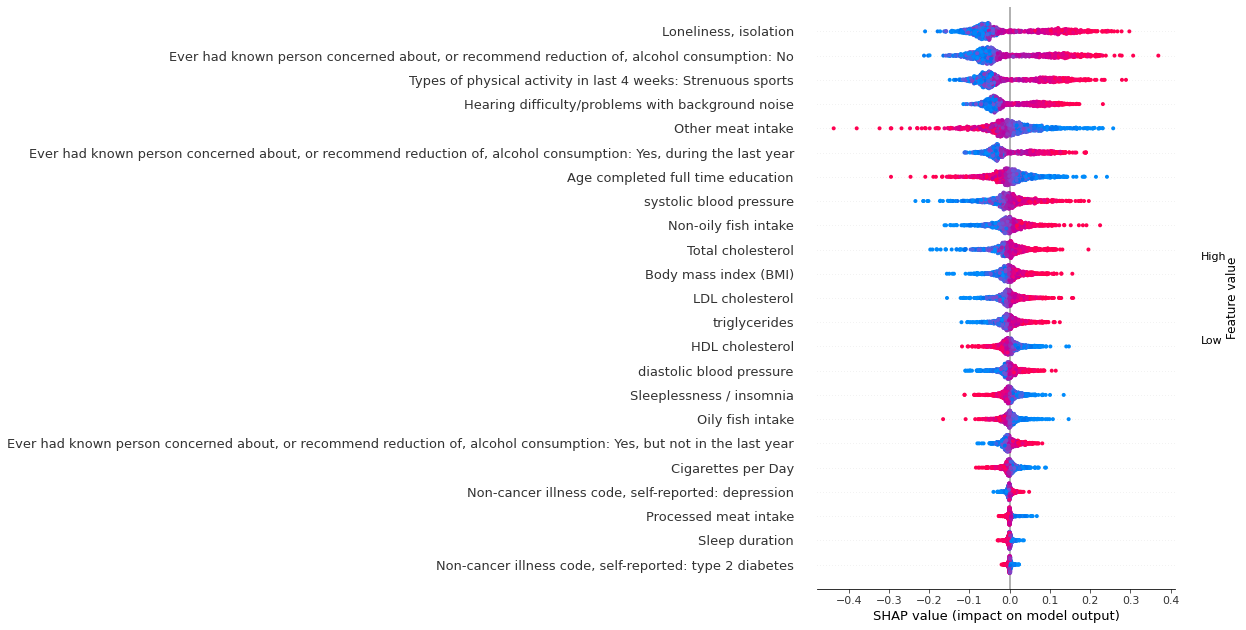

In [24]:
import json
all_traits = json.load(open('all_traits_map.json', 'r'))
# print(all_traits)
GWAS_IDS = list(all_traits)
# print(GWAS_IDS)
traits = [all_traits[x] for x in all_traits]
print(traits)
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
# usable_features_std = (usable_features - usable_features.mean(0))/usable_features.std(0)
shap.summary_plot(shap_values, features=usable_features, feature_names=traits, plot_type='dot', max_display=len(traits), show = False)
plt.savefig('shap/summary_plot_hidden_'+ str(hidden) + '.png',  bbox_inches='tight')
# shap.summary_plot(shap_values, features=usable_features, feature_names=list(range(23)), plot_type='dot', max_display=len(traits))

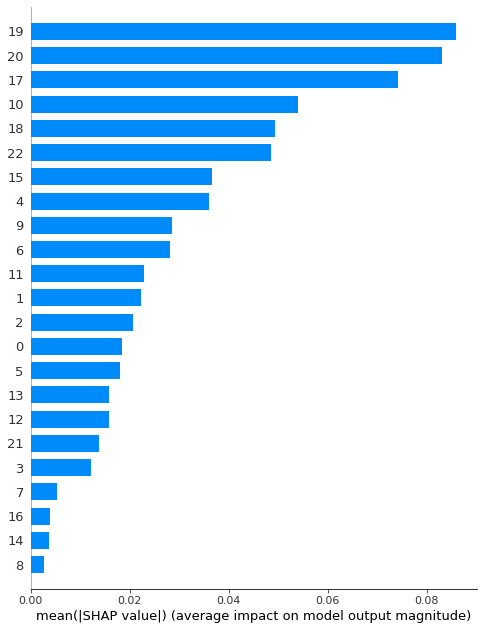

In [25]:
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html?highlight=beeswarm#shap.summary_plot
shap.summary_plot(shap_values, features=usable_features, feature_names=list(range(23)), plot_type='bar', max_display=len(traits), show=False)
plt.savefig('shap/summary_plot_hidden_'+ str(hidden) + '_bar.png', bbox_inches='tight')

In [26]:
sorted(list(zip(list(range(23)), abs(shap_values).mean(0))), key=lambda x:x[1], reverse=True)

[(19, 0.085860898431757),
 (20, 0.0830808812012117),
 (17, 0.07409537537552552),
 (10, 0.053932859654066766),
 (18, 0.0492647872609649),
 (22, 0.048581882013913454),
 (15, 0.03667190623224312),
 (4, 0.035911094846744124),
 (9, 0.028634073742297744),
 (6, 0.02812697706900676),
 (11, 0.022873866657118564),
 (1, 0.022231675426410583),
 (2, 0.020666691986785626),
 (0, 0.018429477539835013),
 (5, 0.01813319073493104),
 (13, 0.015878057906001525),
 (12, 0.01586507600451843),
 (21, 0.013748695786648146),
 (3, 0.01219441450250858),
 (7, 0.005321635295294658),
 (16, 0.00395462758309153),
 (14, 0.0036604209599568646),
 (8, 0.0027007070295470277)]

In [27]:
help(shap.force_plot)


Help on function force in module shap.plots._force:

force(base_value, shap_values=None, features=None, feature_names=None, out_names=None, link='identity', plot_cmap='RdBu', matplotlib=False, show=True, figsize=(20, 3), ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, contribution_threshold=0.05)
    Visualize the given SHAP values with an additive force layout.
    
    Parameters
    ----------
    base_value : float
        This is the reference value that the feature contributions start from. For SHAP values it should
        be the value of explainer.expected_value.
    
    shap_values : numpy.array
        Matrix of SHAP values (# features) or (# samples x # features). If this is a 1D array then a single
        force plot will be drawn, if it is a 2D array then a stacked force plot will be drawn.
    
    features : numpy.array
        Matrix of feature values (# features) or (# samples x # features). This provides the values of all the
        features, an

In [28]:

# print(Final_Samples)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier, MLPRegressor, BernoulliRBM

feature_indices_to_consider = list(range(0, 23)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]

usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])

Final_Samples = positive_samples[:500] + negative_samples[:500]
random.seed(2);random.shuffle(Final_Samples)
# Final_Samples = np.array(Final_Samples)
print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
print(sum(usable_labels), len(usable_labels))

X_train, X_test, y_train, y_test = train_test_split(
    usable_features, usable_labels, test_size=0.1)

X_train.shape, y_train.shape

X_test.shape, y_test.shape

print(y_test.sum(), y_test.shape)
clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
# clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam').fit(X_train, y_train)
clf.score(X_test, y_test)

500 500
500.0 1000
55.0 (100,)


0.59

In [36]:
random.shuffle(Final_Samples)
usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])


from sklearn.model_selection import KFold
X = usable_features[:, :23]
y = usable_labels
kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf)
# print(y_test)
accuracies = []
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
#     print(y_test.sum(), y_test.shape)
    print(clf.score(X_test, y_test))
    accuracies += [clf.score(X_test, y_test)]
print(np.mean(accuracies), np.std(accuracies))


KFold(n_splits=10, random_state=None, shuffle=False)
0.61
0.58
0.71
0.66
0.61
0.63
0.6
0.62
0.69
0.67
0.6379999999999999 0.04019950248448356


In [40]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

accuracies = []
X = usable_features[:, :23]
y = usable_labels
kf = KFold(n_splits=10)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = RandomForestClassifier(random_state=0)
    reg.fit(X_train, y_train)
    print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")
#     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
#     print(y_test.sum(), y_test.shape)
    accuracies += [reg.score(X_test, y_test)]
print(np.mean(accuracies), np.std(accuracies))
save_in_file("Random Forest", np.mean(accuracies))

Accuracy of model :  64.0 %
Accuracy of model :  65.0 %
Accuracy of model :  65.0 %
Accuracy of model :  70.0 %
Accuracy of model :  67.0 %
Accuracy of model :  62.0 %
Accuracy of model :  63.0 %
Accuracy of model :  63.0 %
Accuracy of model :  72.0 %
Accuracy of model :  63.0 %
0.6539999999999999 0.031368774282716234


In [ ]:
from xgboost import XGBRegressor, XGBClassifier
model_name = "XGB"

accuracies = []
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = XGBClassifier()
    reg.fit(X_train, y_train)
    print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")
#     clf = MLPClassifier(hidden_layer_sizes=(32,8), activation='relu', solver='adam', max_iter=100, learning_rate='invscaling').fit(X_train, y_train)
#     print(y_test.sum(), y_test.shape)
    accuracies += [reg.score(X_test, y_test)]
print(np.mean(accuracies), np.std(accuracies))
save_in_file("XGBoost", np.mean(accuracies))